<a href="https://colab.research.google.com/github/MiekeNap/DataAnalytics_FinalAssignment/blob/main/Final_Assignment_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1


**1:What is the biggest predictor of a large CO2 output per capita of a country?**

To determine this you may want to consider things like GDP per capita, diets, number of cars per capita, various energy source, mobility and other factors.

Your answer can also be a specific combination of certain factors.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

import matplotlib.font_manager
%matplotlib inline
from matplotlib.pyplot import figure
import plotly.express as px 
from scipy import stats

%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# Preparing data set

In [ ]:
df_predictors = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv", encoding = 'cp1252')
df_predictors.head()
df_predictors.columns
df_predictors.drop(columns = ['iso_code', 'gdp', 'cement_co2', 'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'cumulative_co2_including_luc', 'cumulative_luc_co2', 'land_use_change_co2',
       'share_global_co2_including_luc',
       'share_global_cumulative_co2_including_luc',
       'share_global_cumulative_luc_co2', 'share_global_luc_co2',
        'co2', 'co2_growth_abs', 'co2_growth_prct',
        'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
        'consumption_co2', 'consumption_co2_per_gdp', 
        'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2',
       'energy_per_gdp', 'flaring_co2', 'gas_co2',
       'ghg_excluding_lucf_per_capita',
       'methane', 'methane_per_capita', 'nitrous_oxide',
       'nitrous_oxide_per_capita', 'oil_co2',
       'other_industry_co2', 'other_co2_per_capita',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_coal_co2',
       'share_global_cumulative_flaring_co2',
       'share_global_cumulative_gas_co2', 'share_global_cumulative_oil_co2',
       'share_global_cumulative_other_co2', 'share_global_flaring_co2',
       'share_global_gas_co2', 'share_global_oil_co2',
       'share_global_other_co2', 'total_ghg', 'total_ghg_excluding_lucf',
       'trade_co2', 'trade_co2_share'], inplace = True)
df_predictors.columns



Index(['country', 'year', 'population', 'cement_co2_per_capita',
       'co2_per_capita', 'coal_co2_per_capita', 'consumption_co2_per_capita',
       'energy_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'ghg_per_capita', 'land_use_change_co2_per_capita',
       'oil_co2_per_capita'],
      dtype='object')

In [ ]:
df_predictors.rename(columns={'country': 'Entity', 'year': 'Year'}, inplace=True)
df_predictors

,Entity,Year,population,cement_co2_per_capita,co2_per_capita,coal_co2_per_capita,consumption_co2_per_capita,energy_per_capita,flaring_co2_per_capita,gas_co2_per_capita,ghg_per_capita,land_use_change_co2_per_capita,oil_co2_per_capita
0,Afghanistan,1850,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.781,NaN
1,Afghanistan,1851,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.787,NaN
2,Afghanistan,1852,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.784,NaN
3,Afghanistan,1853,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.789,NaN
4,Afghanistan,1854,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.785,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,14751101.0,0.032,0.651,0.400,0.712,3114.076,0.0,0.0,7.836,0.643,0.219
46519,Zimbabwe,2018,15052191.0,0.037,0.784,0.477,0.835,3155.824,0.0,0.0,7.854,0.587,0.270
46520,Zimbabwe,2019,15354606.0,0.037,0.724,0.449,0.788,3219.013,0.0,0.0,7.682,0.542,0.238
46521,Zimbabwe,2020,15669663.0,0.036,0.677,0.429,0.741,NaN,0.0,0.0,NaN,0.503,0.212


In [ ]:
df_sectors = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Assignment/per-capita-ghg-sector.csv')
df_sectors.head()

,Entity,Code,Year,Aviation and shipping (per capita),Land-use change and forestry (per capita),Manufacturing and construction (per capita),Fugitive emissions (per capita),Agriculture (per capita),Buildings (per capita),Electricity and heat (per capita),Industry (per capita),Transport (per capita),Waste (per capita)
0,Afghanistan,AFG,1990,0.001611,-0.192551,0.033032,0.022558,0.650161,0.006445,0.013696,0.004028,0.134544,0.099095
1,Afghanistan,AFG,1991,0.001504,-0.179713,0.030077,0.018046,0.631626,0.005264,0.012783,0.004512,0.116550,0.099255
2,Afghanistan,AFG,1992,0.001381,-0.164992,0.025543,0.013807,0.580579,0.002071,0.011045,0.004142,0.053156,0.096648
3,Afghanistan,AFG,1993,0.001264,-0.151107,0.022761,0.010116,0.536778,0.001897,0.010116,0.003793,0.046786,0.094205
4,Afghanistan,AFG,1994,0.001171,-0.139965,0.019911,0.007028,0.498954,0.001171,0.009370,0.003514,0.041579,0.092529


In [ ]:
df_gdp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Assignment/gdp-per-capita-maddison-2020.csv')
df_gdp.head()
df_gdp.columns
df_gdp.drop(columns=['Code', '417485-annotations'], inplace=True)
df_gdp.head()

,Entity,Year,GDP per capita
0,Afghanistan,1950,1156.0
1,Afghanistan,1951,1170.0
2,Afghanistan,1952,1189.0
3,Afghanistan,1953,1240.0
4,Afghanistan,1954,1245.0


In [ ]:
df_predictor_sectors = pd.merge(df_predictors, df_sectors, on=('Entity', 'Year'))
df_all = pd.merge(df_gdp, df_predictor_sectors, on=('Entity', 'Year'))
df_all

,Entity,Year,GDP per capita,population,cement_co2_per_capita,co2_per_capita,coal_co2_per_capita,consumption_co2_per_capita,energy_per_capita,flaring_co2_per_capita,...,Aviation and shipping (per capita),Land-use change and forestry (per capita),Manufacturing and construction (per capita),Fugitive emissions (per capita),Agriculture (per capita),Buildings (per capita),Electricity and heat (per capita),Industry (per capita),Transport (per capita),Waste (per capita)
0,Afghanistan,1990,963.000000,10694804.0,0.004,0.189,0.026,NaN,2968.316,0.002,...,0.001611,-0.192551,0.033032,0.022558,0.650161,0.006445,0.013696,0.004028,0.134544,0.099095
1,Afghanistan,1991,881.170410,10745168.0,0.004,0.178,0.023,NaN,1293.862,0.002,...,0.001504,-0.179713,0.030077,0.018046,0.631626,0.005264,0.012783,0.004512,0.116550,0.099255
2,Afghanistan,1992,843.875305,12057436.0,0.004,0.123,0.002,NaN,760.342,0.002,...,0.001381,-0.164992,0.025543,0.013807,0.580579,0.002071,0.011045,0.004142,0.053156,0.096648
3,Afghanistan,1993,578.402710,14003764.0,0.003,0.106,0.001,NaN,650.207,0.002,...,0.001264,-0.151107,0.022761,0.010116,0.536778,0.001897,0.010116,0.003793,0.046786,0.094205
4,Afghanistan,1994,428.424591,15455560.0,0.003,0.094,0.001,NaN,570.403,0.001,...,0.001171,-0.139965,0.019911,0.007028,0.498954,0.001171,0.009370,0.003514,0.041579,0.092529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668,Zimbabwe,2014,1594.000000,13855758.0,0.036,0.862,0.558,0.934,3940.886,0.000,...,0.002944,0.845679,0.080225,0.044161,0.750734,0.185475,0.507113,0.111874,0.200196,0.175171
4669,Zimbabwe,2015,1560.000000,14154937.0,0.041,0.866,0.569,0.960,3860.920,0.000,...,0.005067,0.840413,0.080350,0.047775,0.827383,0.187482,0.524805,0.120162,0.191825,0.175900
4670,Zimbabwe,2016,1534.000000,14452705.0,0.032,0.729,0.480,0.826,3228.872,0.000,...,0.009266,6.229358,0.079114,0.048466,0.749091,0.188876,0.446176,0.126868,0.160367,0.176760
4671,Zimbabwe,2017,1582.366211,14751101.0,0.032,0.651,0.400,0.712,3114.076,0.000,...,0.011239,6.131380,0.080075,0.049169,0.758608,0.188247,0.382114,0.132756,0.162258,0.178413


In [ ]:
average_null_data = round(df_all.isnull().mean() * 100)
average_null_data

Entity                                          0.0
Year                                            0.0
GDP per capita                                  0.0
population                                      0.0
cement_co2_per_capita                           2.0
co2_per_capita                                  0.0
coal_co2_per_capita                             0.0
consumption_co2_per_capita                     28.0
energy_per_capita                               1.0
flaring_co2_per_capita                          0.0
gas_co2_per_capita                              0.0
ghg_per_capita                                  0.0
land_use_change_co2_per_capita                  1.0
oil_co2_per_capita                              0.0
Code                                            0.0
Aviation and shipping (per capita)              1.0
Land-use change and forestry (per capita)       0.0
Manufacturing and construction (per capita)     1.0
Fugitive emissions (per capita)                 0.0
Agriculture 

In [ ]:
df_all.drop(columns=['Year', 'flaring_co2_per_capita',
       'ghg_per_capita', 'land_use_change_co2_per_capita'], inplace=True)
df_correlations = round(df_all.corr().reset_index(), 2)
df_correlations

,index,GDP per capita,population,cement_co2_per_capita,co2_per_capita,coal_co2_per_capita,consumption_co2_per_capita,energy_per_capita,gas_co2_per_capita,oil_co2_per_capita,Aviation and shipping (per capita),Land-use change and forestry (per capita),Manufacturing and construction (per capita),Fugitive emissions (per capita),Agriculture (per capita),Buildings (per capita),Electricity and heat (per capita),Industry (per capita),Transport (per capita),Waste (per capita)
0,GDP per capita,1.00,-0.02,0.58,0.57,0.29,0.77,0.79,0.52,0.32,0.36,-0.21,0.60,0.29,0.06,0.48,0.62,0.55,0.76,0.14
1,population,-0.02,1.00,0.03,-0.01,0.06,-0.05,-0.03,-0.03,-0.02,-0.03,-0.02,0.01,-0.03,-0.04,0.00,-0.01,-0.01,-0.02,-0.04
2,cement_co2_per_capita,0.58,0.03,1.00,0.48,0.24,0.58,0.53,0.43,0.27,0.15,-0.20,0.62,0.26,-0.05,0.39,0.47,0.48,0.66,0.18
3,co2_per_capita,0.57,-0.01,0.48,1.00,0.32,0.69,0.71,0.65,0.84,0.21,-0.15,0.60,0.44,0.01,0.33,0.71,0.40,0.58,0.19
4,coal_co2_per_capita,0.29,0.06,0.24,0.32,1.00,0.39,0.28,0.01,0.10,-0.04,-0.18,0.33,-0.08,0.20,0.43,0.43,0.17,0.32,-0.01
5,consumption_co2_per_capita,0.77,-0.05,0.58,0.69,0.39,1.00,0.90,0.64,0.39,0.52,-0.21,0.73,0.51,0.00,0.51,0.77,0.58,0.76,0.26
6,energy_per_capita,0.79,-0.03,0.53,0.71,0.28,0.90,1.00,0.78,0.36,0.48,-0.20,0.72,0.45,0.02,0.38,0.80,0.61,0.73,0.30
7,gas_co2_per_capita,0.52,-0.03,0.43,0.65,0.01,0.64,0.78,1.00,0.21,0.21,-0.09,0.63,0.62,-0.07,0.18,0.78,0.37,0.46,0.27
8,oil_co2_per_capita,0.32,-0.02,0.27,0.84,0.10,0.39,0.36,0.21,1.00,0.17,-0.09,0.28,0.19,0.00,0.20,0.30,0.25,0.38,0.09
9,Aviation and shipping (per capita),0.36,-0.03,0.15,0.21,-0.04,0.52,0.48,0.21,0.17,1.00,-0.06,0.34,0.09,-0.08,0.03,0.26,0.41,0.24,0.13


In [ ]:
df_correlations.columns

Index(['index', 'GDP per capita', 'population', 'cement_co2_per_capita',
       'co2_per_capita', 'coal_co2_per_capita', 'consumption_co2_per_capita',
       'energy_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'Aviation and shipping (per capita)',
       'Land-use change and forestry (per capita)',
       'Manufacturing and construction (per capita)',
       'Fugitive emissions (per capita)', 'Agriculture (per capita)',
       'Buildings (per capita)', 'Electricity and heat (per capita)',
       'Industry (per capita)', 'Transport (per capita)',
       'Waste (per capita)'],
      dtype='object')

# Results correlations

In [ ]:
df_correlations.columns
df_correlations.columns = ['index', 'gdp', 'population', 'cement', 'co2',
       'coal', 'consumption',
       'energy', 'gas', 'oil',
       'Aviation and shipping',
       'Land-use change and forestry',
       'Manufacturing and construction',
       'Fugitive emissions', 'Agriculture',
       'Buildings', 'Electricity and heat',
       'Industry', 'Transport',
       'Waste']
df_correlations#.iloc[:,1:]


,index,gdp,population,cement,co2,coal,consumption,energy,gas,oil,Aviation and shipping,Land-use change and forestry,Manufacturing and construction,Fugitive emissions,Agriculture,Buildings,Electricity and heat,Industry,Transport,Waste
0,GDP per capita,1.00,-0.02,0.58,0.57,0.29,0.77,0.79,0.52,0.32,0.36,-0.21,0.60,0.29,0.06,0.48,0.62,0.55,0.76,0.14
1,population,-0.02,1.00,0.03,-0.01,0.06,-0.05,-0.03,-0.03,-0.02,-0.03,-0.02,0.01,-0.03,-0.04,0.00,-0.01,-0.01,-0.02,-0.04
2,cement_co2_per_capita,0.58,0.03,1.00,0.48,0.24,0.58,0.53,0.43,0.27,0.15,-0.20,0.62,0.26,-0.05,0.39,0.47,0.48,0.66,0.18
3,co2_per_capita,0.57,-0.01,0.48,1.00,0.32,0.69,0.71,0.65,0.84,0.21,-0.15,0.60,0.44,0.01,0.33,0.71,0.40,0.58,0.19
4,coal_co2_per_capita,0.29,0.06,0.24,0.32,1.00,0.39,0.28,0.01,0.10,-0.04,-0.18,0.33,-0.08,0.20,0.43,0.43,0.17,0.32,-0.01
5,consumption_co2_per_capita,0.77,-0.05,0.58,0.69,0.39,1.00,0.90,0.64,0.39,0.52,-0.21,0.73,0.51,0.00,0.51,0.77,0.58,0.76,0.26
6,energy_per_capita,0.79,-0.03,0.53,0.71,0.28,0.90,1.00,0.78,0.36,0.48,-0.20,0.72,0.45,0.02,0.38,0.80,0.61,0.73,0.30
7,gas_co2_per_capita,0.52,-0.03,0.43,0.65,0.01,0.64,0.78,1.00,0.21,0.21,-0.09,0.63,0.62,-0.07,0.18,0.78,0.37,0.46,0.27
8,oil_co2_per_capita,0.32,-0.02,0.27,0.84,0.10,0.39,0.36,0.21,1.00,0.17,-0.09,0.28,0.19,0.00,0.20,0.30,0.25,0.38,0.09
9,Aviation and shipping (per capita),0.36,-0.03,0.15,0.21,-0.04,0.52,0.48,0.21,0.17,1.00,-0.06,0.34,0.09,-0.08,0.03,0.26,0.41,0.24,0.13


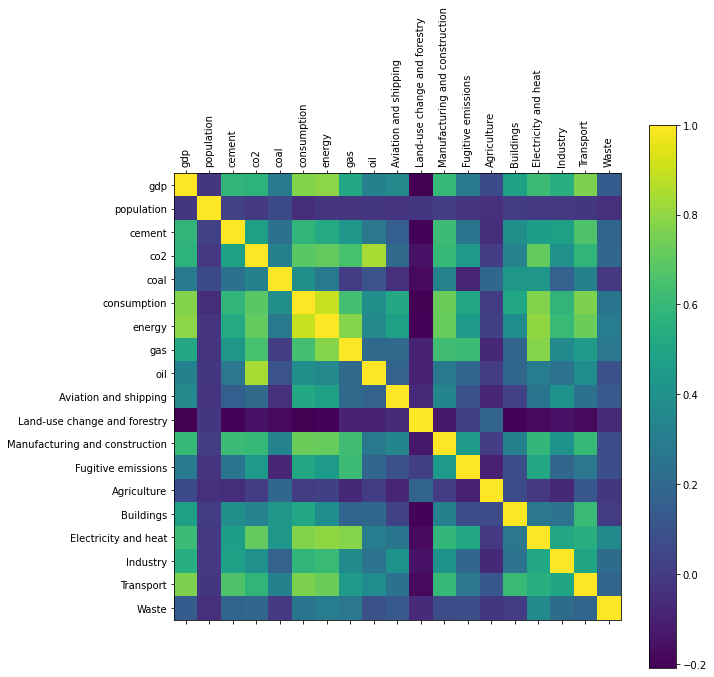

In [ ]:
categories = df_correlations.columns[1:]

data = df_correlations.iloc[:,1:]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(data, interpolation='nearest')
fig.colorbar(cax)


xaxis = np.arange(len(categories))
yaxis = np.arange(len(categories))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(categories, rotation=90)
ax.set_yticklabels(categories)

plt.show()

For the CO2 emission per capita, the correlation coefficient is highest for energy and consumption, due to electricity and heat.
Therefore the biggest predictor is the energy production and consumption, related to electricity and heat.

In [ ]:
# Crosscheck for the countries with highest CO2 emission if they are related to the topics found by the correlation calculations.
df_top_emissions = df_all.sort_values(by='co2_per_capita', ascending=False)
#df_top_emissions.head(50)

# Countries with highes CO2 emission per capita in the past are: Qatar, United Arab Emirates, Trinidad and Tobago, Kuwait, Luxembourg

In [ ]:
df_all.columns

Index(['Entity', 'GDP per capita', 'population', 'cement_co2_per_capita',
       'co2_per_capita', 'coal_co2_per_capita', 'consumption_co2_per_capita',
       'energy_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita', 'Code',
       'Aviation and shipping (per capita)',
       'Land-use change and forestry (per capita)',
       'Manufacturing and construction (per capita)',
       'Fugitive emissions (per capita)', 'Agriculture (per capita)',
       'Buildings (per capita)', 'Electricity and heat (per capita)',
       'Industry (per capita)', 'Transport (per capita)',
       'Waste (per capita)'],
      dtype='object')

In [ ]:
# Dataframe with all mean values, sorted on CO2_per_capita with highest values on top, and selecting the top five producers of CO2
df_all.groupby(['Entity'])['GDP per capita', 'population', 'cement_co2_per_capita',
       'co2_per_capita', 'coal_co2_per_capita', 'consumption_co2_per_capita',
       'energy_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita', 'Code',
       'Aviation and shipping (per capita)',
       'Land-use change and forestry (per capita)',
       'Manufacturing and construction (per capita)',
       'Fugitive emissions (per capita)', 'Agriculture (per capita)',
       'Buildings (per capita)', 'Electricity and heat (per capita)',
       'Industry (per capita)', 'Transport (per capita)',
       'Waste (per capita)'].mean().reset_index().sort_values('co2_per_capita', ascending=False).iloc[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Entity,GDP per capita,population,cement_co2_per_capita,co2_per_capita,coal_co2_per_capita,consumption_co2_per_capita,energy_per_capita,gas_co2_per_capita,oil_co2_per_capita,Aviation and shipping (per capita),Land-use change and forestry (per capita),Manufacturing and construction (per capita),Fugitive emissions (per capita),Agriculture (per capita),Buildings (per capita),Electricity and heat (per capita),Industry (per capita),Transport (per capita),Waste (per capita)
120,Qatar,81913.966629,1.207651e+06,0.683690,49.588310,0.000000,33.644483,230129.289897,37.489862,9.881552,1.802478,0.000000,7.147965,14.160715,0.237952,0.198409,21.693900,0.863399,4.573279,0.454831
78,Kuwait,49754.479778,2.510924e+06,0.284517,39.490034,0.000000,24.583172,105970.947138,9.413310,28.720690,1.546345,-0.007538,3.243596,8.199579,0.125917,0.169938,15.062405,1.818360,3.397871,0.606237
151,United Arab Emirates,55663.393880,5.476200e+06,0.793148,25.595074,0.259556,28.907556,155954.860296,16.847926,7.294963,11.191190,0.000000,10.103081,5.172846,0.278484,0.082912,8.813479,1.167121,4.632508,1.526898
9,Bahrain,23955.345232,9.304097e+05,0.193345,23.496655,0.000000,15.375241,150409.189345,19.729448,3.548759,1.679688,0.000000,0.461109,3.857643,0.052811,0.250046,19.260494,1.254161,2.460610,7.383165
145,Trinidad and Tobago,23318.764514,1.370139e+06,0.210828,23.460966,0.000000,12.107000,114753.659034,19.647828,3.005379,1.265964,0.086548,1.816093,4.661665,0.193292,0.262182,7.318385,1.052725,1.728562,0.718117
